In [ ]:
https://www.toptal.com/machine-learning/nlp-tutorial-text-classification

In [11]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from util import get_top_x

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\Data\wine-reviews\winemag-data-130k-v2.csv")

In [4]:
counter = Counter(df['variety'].tolist())

In [5]:
type(counter)

collections.Counter

In [6]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

In [7]:
df['variety'].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Name: variety, dtype: int64

In [8]:
varietal_list = [top_10_varieties[i] for i in df['variety'].tolist()]
varietal_list = np.array(varietal_list)
#note: this is making a list of the wine varieties by their index in the top 10

In [9]:
varietal_list[:10]

array([5, 0, 2, 2, 1, 5, 3, 0, 9, 0])

In [12]:
#df and df['variety'] already exist here
#counter already exists in this file, otherwise make a counter on df['variety']

In [13]:
top_10_varieties = {i[0]: idx for idx, i in enumerate(counter.most_common(10))}

In [14]:
df = df[df['variety'].map(lambda x: x in top_10_varieties)]

In [15]:
description_list = df['description'].tolist()

In [16]:
mapped_list, word_list = get_top_x.filter_to_top_x(description_list, 2500, 10)

In [17]:
varietal_list_o = [top_10_varieties[i] for i in df['variety'].tolist()]

In [18]:
varietal_list = to_categorical(varietal_list_o)

In [19]:
max_review_length = 150

In [20]:
mapped_list = sequence.pad_sequences(mapped_list, maxlen=max_review_length)
train_x, test_x, train_y, test_y = train_test_split(mapped_list, varietal_list, test_size=0.3)

In [21]:
max_review_length = 150

In [22]:
embedding_vector_length = 64

In [23]:
model = Sequential()

In [24]:
model.add(Embedding(2500, embedding_vector_length, input_length=max_review_length))
model.add(Conv1D(50, 5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(max(varietal_list_o) + 1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=5, validation_split=0.1,batch_size=64)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 44932 samples, validate on 4993 samples
Epoch 1/5
44932/44932 [==============================] - 9s 193us/step - loss: 1.0437 - acc: 0.6354 - val_loss: 0.7275 - val_acc: 0.7470
Epoch 2/5
44932/44932 [==============================] - 4s 82us/step - loss: 0.6284 - acc: 0.7857 - val_loss: 0.6834 - val_acc: 0.7695
Epoch 3/5
44932/44932 [==============================] - 3s 77us/step - loss: 0.4989 - acc: 0.8281 - val_loss: 0.7185 - val_acc: 0.7673
Epoch 4/5
44932/44932 [==============================] - 3s 77us/step - loss: 0.3714 - acc: 0.8739 - val_loss: 0.7690 - val_acc: 0.7645
Epoch 5/5
44932/44932 [==============================] - 4s 78us/step - loss: 0.2389 - acc: 0.9214 - val_loss: 0.8961 - val_acc: 0.7615


In [25]:
y_score = model.predict(test_x)
y_score = [[1 if i == max(sc) else 0 for i in sc] for sc in y_score]
n_right = 0
for i in range(len(y_score)):
    if all(y_score[i][j] == test_y[i][j] for j in range(len(y_score[i]))):
        n_right += 1

In [26]:
print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 75.72%


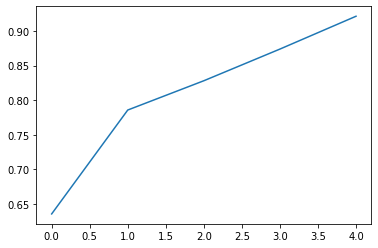

In [27]:
plt.plot(history.history['acc'])

In [28]:
list(history.history.keys())

['val_loss', 'val_acc', 'loss', 'acc']